In [1]:
import mcmcplotlib as mcplot
import numpy as np
import theano.tensor as tt
%matplotlib inline

In [2]:
n,p = 100,3
data = np.random.normal(0,10, size=(100,3))
beta = np.array([[4],[2],[-10]])
sigma = .1
const = 5
Y = const + data@beta + np.random.normal(0,sigma, size=(100,3))

In [3]:
import pymc3 as mc

In [4]:
with mc.Model() as demo:
    const = mc.Normal('const', 0,sd=10)
    beta_ = mc.Normal('beta', 0,sd=10, shape=p)
    sigma_ = mc.HalfCauchy('sigma', 5)
    
    mu = const + tt.dot(data,beta)
    
    response = mc.Normal('response', mu=mu, sd=sigma_, shape=n, observed=Y.flatten())

In [5]:
with demo:
    trace = mc.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1.9198e+05: 100%|██████████| 200000/200000 [01:23<00:00, 2407.74it/s]
Finished [100%]: Average ELBO = -1.9198e+05
100%|██████████| 500/500 [00:07<00:00, 67.39it/s] 


In [8]:
from mcmcplotlib import plots
import matplotlib.pyplot as plt
import imp
imp.reload(plots);

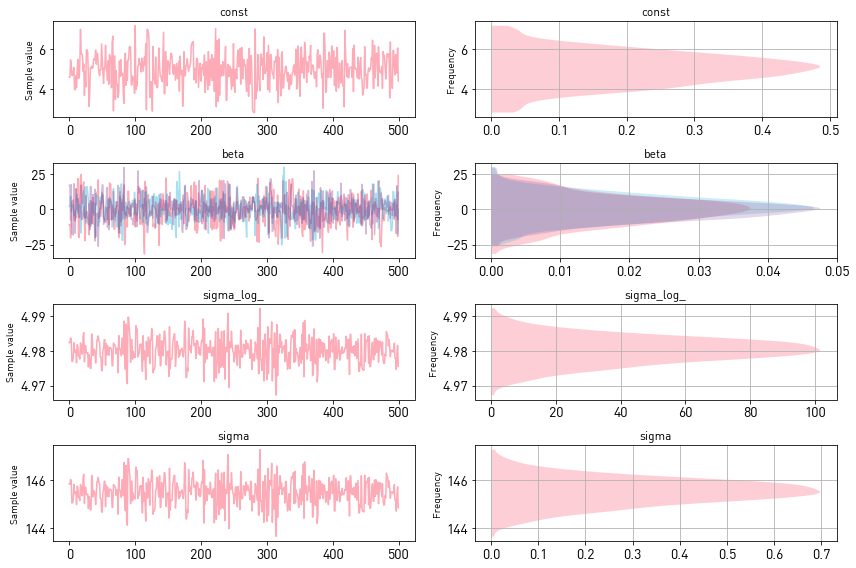

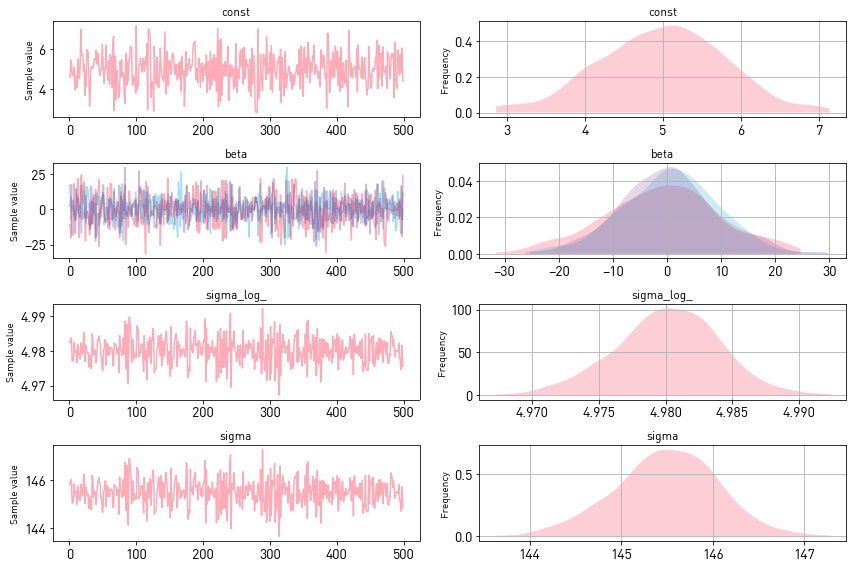

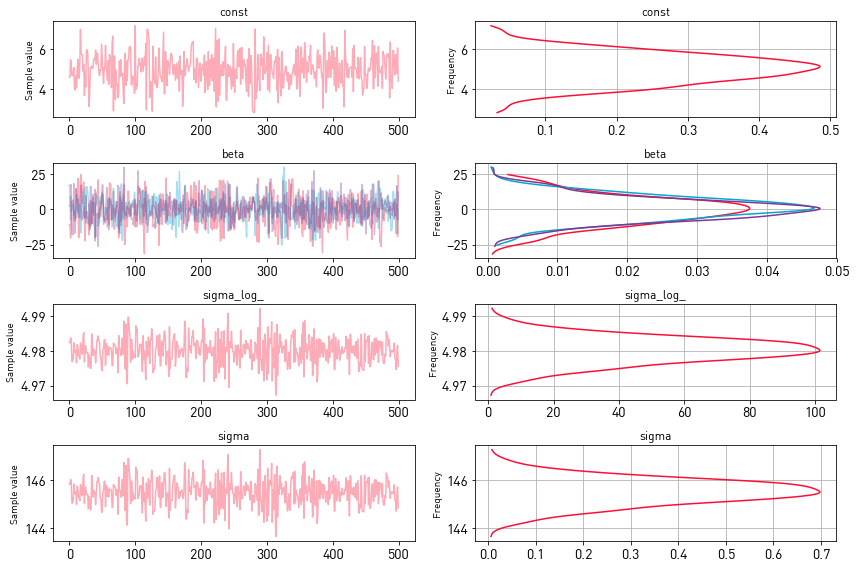

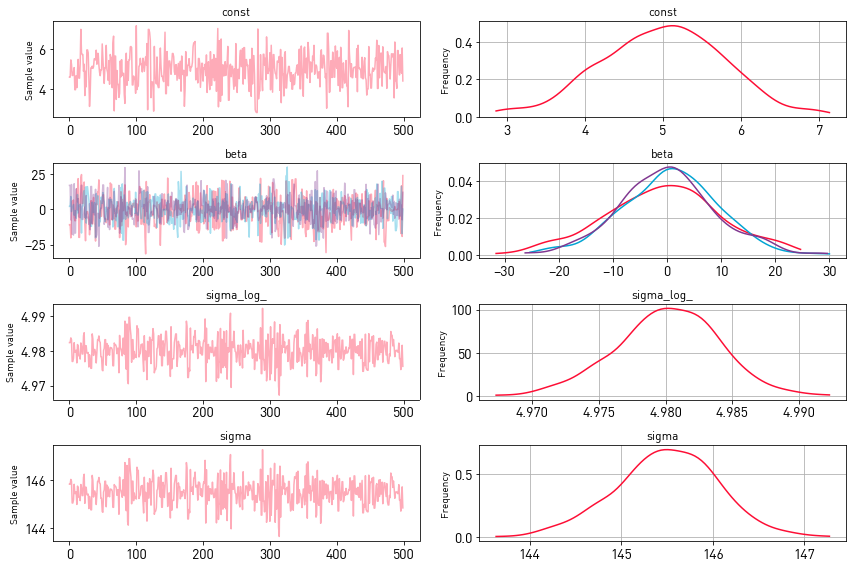

In [9]:
plots.traceplot(trace, shade=True, vertical=True); plt.show(); plt.close()
plots.traceplot(trace, shade=True, vertical=False); plt.show(); plt.close()
plots.traceplot(trace, shade=False, vertical=True); plt.show(); plt.close()
plots.traceplot(trace, shade=False, vertical=False); plt.show(); plt.close()